# Problema 1

Grupa O: Frecventa relativa = 0.47
Grupa A: Frecventa relativa = 0.45
Grupa B: Frecventa relativa = 0.07
Grupa AB: Frecventa relativa = 0.01


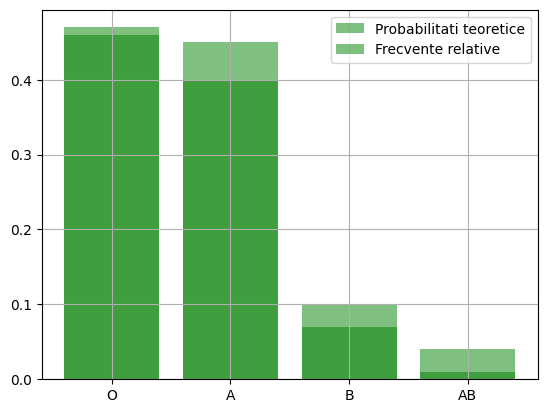

In [70]:
from scipy.stats import uniform
from matplotlib import pyplot as plt

N = 1000
dist = {"O": 0.46,
         "A": 0.4,
         "B": 0.1,
         "AB": 0.04,
         }
prob_cum = [0]+[sum(list(dist.values())[:i+1])for i in range(len(dist))]
# print(prob_cum)
dist_unif = uniform.rvs(0,1,size=N)
X = []
for u in dist_unif:
    for k in range(1,len(prob_cum)):
        if prob_cum[k-1]< u <= prob_cum[k]:
            X.append(list(dist.keys())[k-1])
# print(X)
frecvente = [X.count(g) / N for g in list(dist.keys())]
for g, f in zip(list(dist.keys()), frecvente):
    print(f"Grupa {g}: Frecventa relativa = {f}")


plt.bar(list(dist.keys()),list(dist.values()),alpha=0.5,color="green", label="Probabilitati teoretice")
plt.bar(list(dist.keys()),frecvente,alpha=0.5,color="green", label="Frecvente relative")

plt.grid()
plt.legend()
plt.show()

# Problema 2

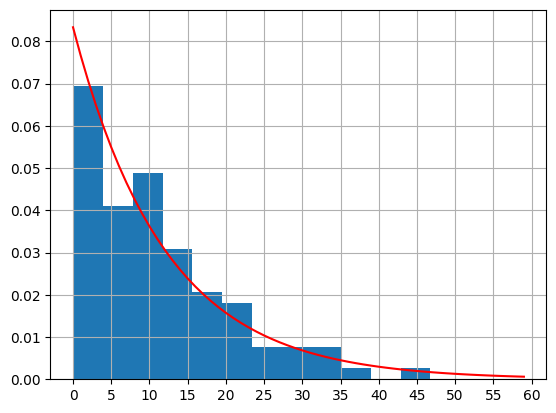

Probabilitate estimată (simulare): 0.69
Probabilitate teoretică: 0.6592406302004438


In [112]:
from scipy.stats import expon
from matplotlib import pyplot as plt
alpha = 1/12
# sims = expon.rvs(loc=0,scale=1/alpha,size=N)

unif = uniform.rvs(0,1,size=N)
sims = [expon.ppf(i,loc=0,scale=1/alpha) for i in unif]
bins = 12
interval = [i for i in range(0,61,5)]

plt.hist(sims, bins=bins, density=True)
plt.plot(range(60),expon.pdf(range(60),loc=0,scale=1/alpha),'r-')

plt.xticks(interval)
plt.grid()
plt.show()
prob_empirica = sum(1 for t in sims if t >= 5) / N
print(f"Probabilitate estimată (simulare): {prob_empirica}")
print(f"Probabilitate teoretică: {expon.sf(5,loc=0,scale=1/alpha)}")

In [92]:
help(expon)

Help on expon_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.expon_gen object>
    An exponential continuous random variable.

    As an instance of the `rv_continuous` class, `expon` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.

    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(x, loc=0, scale=1)
        Log of the survival function.
    ppf(q, loc=0, scale=1)
  